[[0.00e+00 5.10e+00 3.50e+00 1.40e+00 2.00e-01]
 [1.00e+00 4.90e+00 3.00e+00 1.40e+00 2.00e-01]
 [2.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [3.00e+00 4.60e+00 3.10e+00 1.50e+00 2.00e-01]
 [4.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [5.00e+00 5.40e+00 3.90e+00 1.70e+00 4.00e-01]
 [6.00e+00 4.60e+00 3.40e+00 1.40e+00 3.00e-01]
 [7.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [8.00e+00 4.40e+00 2.90e+00 1.40e+00 2.00e-01]
 [9.00e+00 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [1.00e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [1.10e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [1.20e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [1.30e+01 4.30e+00 3.00e+00 1.10e+00 1.00e-01]
 [1.40e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01]
 [1.50e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [1.60e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.70e+01 5.10e+00 3.50e+00 1.40e+00 3.00e-01]
 [1.80e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [1.90e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [2.00e+01 5.40e+00 3.40e+00 1.70e+00 2.

InvalidParameterError: The 'min_samples' parameter of DBSCAN must be an int in the range [1, inf). Got 1.4 instead.

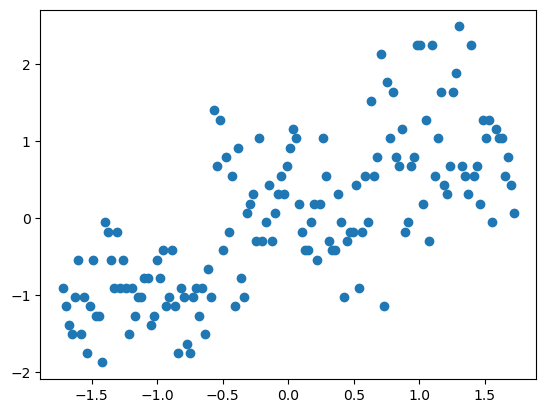

<Figure size 640x480 with 0 Axes>

In [59]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
# X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.45,
#                             random_state=0)


import pandas as pd
ds = pd.read_csv("../data/data1.csv")
X0 = np.array(ds)
X = X0[:,0:X0.shape[1]-1]
print(X)
y = X0[:,X0.shape[1]-1]
labels_true = np.reshape(y,(X0.shape[0],)).astype(int)

#transform the data to make the mean to (0,0) and standard deviation to 1
X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0],X[:,1])
plt.figure()

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.8, min_samples=7).fit(X)

"""
Let's try different parameter settings
(0) regular: 0.2, 8
(1) large eps, small min_samples: 0.8, 4
(2) small eps, large min_samples: 0.1, 8
"""

# 1-dimensional list, filled by all 0s
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# change the value to True for all points that have been classified
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# precision
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# recall
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result


# Remove color black and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]

    # core points belonging to class k
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # non-core points belonging to class k
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()